In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Datasets/music_data.csv')

In [ ]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [ ]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [ ]:
cat_cols = [cols for cols in data if data[cols].dtypes=='O']                    #checking category columns
num_cols = [cols for cols in data if data[cols].dtypes=='float64']              #checking continuous columns
int_cols = [cols for cols in data if data[cols].dtypes=='int64']                #checking discrete columns
print('Category Columns    :',cat_cols)
print('Continuous Columns  :',num_cols)
print('Discrete Columns    :',int_cols)

Category Columns    : ['artists', 'id', 'name', 'release_date']
Continuous Columns  : ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
Discrete Columns    : ['duration_ms', 'explicit', 'key', 'mode', 'popularity', 'year']


In [ ]:
data.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084


In [ ]:
data[['valence', 'danceability']].corr()

,valence,danceability
valence,1.000000,0.560242
danceability,0.560242,1.000000


In [ ]:
data[['loudness', 'energy','tempo']].corr()

,loudness,energy,tempo
loudness,1.000000,0.782982,0.211114
energy,0.782982,1.000000,0.249936
tempo,0.211114,0.249936,1.000000


In [ ]:
data['name'].value_counts()

Summertime                                 62
Overture                                   43
Home                                       40
Stay                                       34
You                                        33
                                           ..
Party With The Devil                        1
Joseph's Coat (The Coat Of Many Colors)     1
Flashback / Finale - Gone With the Wind     1
Life Goes On - Remastered                   1
Somebody From Somewhere                     1
Name: name, Length: 132940, dtype: int64

In [ ]:
items = data['name'].unique()
len(items)

132940

In [ ]:
items = data['id'].unique()
len(items)

169909

In [ ]:
df = data.drop(columns=['key', 'mode', 'duration_ms','artists','release_date', 'id','year','speechiness'])
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,name,popularity,tempo,valence
0,0.995,0.708,0.1950,0,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,118.469,0.7790
1,0.994,0.379,0.0135,0,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,83.972,0.0767
2,0.604,0.749,0.2200,0,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,107.177,0.8800
3,0.995,0.781,0.1300,0,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,108.003,0.7200
4,0.990,0.210,0.2040,0,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,62.149,0.0693


In [ ]:
q=data['artists']

In [ ]:
q.dtypes

q[0][2:-2]

'Carl Woitschach'

In [ ]:
artist_name=q.replace(['\'','\]','\['],'',regex=True).astype(str)

In [ ]:
artist_name.head()

0                       Carl Woitschach
1    Robert Schumann, Vladimir Horowitz
2                   Seweryn Goszczyński
3                      Francisco Canaro
4    Frédéric Chopin, Vladimir Horowitz
Name: artists, dtype: object

In [ ]:
df['Artists']=artist_name

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   danceability      169909 non-null  float64
 2   energy            169909 non-null  float64
 3   explicit          169909 non-null  int64  
 4   instrumentalness  169909 non-null  float64
 5   liveness          169909 non-null  float64
 6   loudness          169909 non-null  float64
 7   name              169909 non-null  object 
 8   popularity        169909 non-null  int64  
 9   tempo             169909 non-null  float64
 10  valence           169909 non-null  float64
 11  Artists           169909 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 15.6+ MB


In [ ]:
df.describe()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,popularity,tempo,valence
count,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,0.488593,0.084863,0.161937,0.206690,-11.370289,31.556610,116.948017,0.532095
std,0.376627,0.175346,0.267390,0.278679,0.309329,0.176796,5.666765,21.582614,30.726937,0.262408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,0.094500,0.417000,0.263000,0.000000,0.000000,0.098400,-14.470000,12.000000,93.516000,0.322000
50%,0.492000,0.548000,0.481000,0.000000,0.000204,0.135000,-10.474000,33.000000,114.778000,0.544000
75%,0.888000,0.667000,0.710000,0.000000,0.086800,0.263000,-7.118000,48.000000,135.712000,0.749000
max,0.996000,0.988000,1.000000,1.000000,1.000000,1.000000,3.855000,100.000000,244.091000,1.000000


In [ ]:
df.tail()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,name,popularity,tempo,valence,Artists
169904,0.1730,0.875,0.443,1,0.000032,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,100.012,0.306,"DripReport, Tyga"
169905,0.0167,0.719,0.385,0,0.031300,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,128.000,0.270,"Leon Bridges, Terrace Martin"
169906,0.5380,0.514,0.539,0,0.002330,0.1080,-9.332,How Would I Know,70,123.700,0.153,"Kygo, Oh Wonder"
169907,0.0714,0.646,0.761,0,0.000000,0.2220,-2.557,I Found You,70,129.916,0.472,"Cash Cash, Andy Grammer"
169908,0.1090,0.512,0.428,0,0.000000,0.1050,-7.387,More Hearts Than Mine,65,80.588,0.366,Ingrid Andress


In [ ]:
X_train, X_test = train_test_split(df, test_size = 0.90, random_state=10)

In [ ]:
X_train.head(30)

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,name,popularity,tempo,valence,Artists
64253,0.986000,0.291,0.19000,0,0.920000,0.1330,-18.735,"Sonata No. 32 in C Minor, Op. 111: II. Arietta...",7,103.913,0.0474,"Ludwig van Beethoven, Glenn Gould"
165974,0.225000,0.499,0.66700,0,0.000000,0.3220,-10.736,You Stopped Loving Me,31,100.092,0.5630,Luther Vandross
142090,0.990000,0.647,0.17600,0,0.258000,0.0891,-16.469,"Cruella De Vil - From ""101 Dalmatians""/Soundtr...",45,105.163,0.2670,Bill Lee
89647,0.854000,0.342,0.26300,0,0.708000,0.3530,-13.295,Main Title (The Wizard of Oz) - Alternate Take...,15,123.369,0.3000,MGM Studio Orchestra
156349,0.007190,0.517,0.63500,0,0.000027,0.1100,-9.294,Light My Fire,32,102.868,0.5910,Stevie Wonder
3408,0.523000,0.586,0.62700,0,0.000027,0.5700,-7.938,On a Carousel,28,121.234,0.7120,The Hollies
149212,0.200000,0.750,0.71200,0,0.000106,0.0513,-6.604,Shake It - 2018 Remaster,40,115.403,0.8870,David Bowie
97020,0.876000,0.611,0.41300,0,0.022600,0.0799,-11.408,Ms,61,130.972,0.0698,alt-J
9387,0.971000,0.202,0.05930,0,0.168000,0.1010,-16.230,"Symphony No. 5 in C Minor, Op. 67: II. Andante...",0,86.030,0.0921,"Ludwig van Beethoven, Arturo Toscanini, NBC Sy..."
72406,0.268000,0.454,0.63900,0,0.000792,0.0435,-7.322,Cadillac,39,118.050,0.6950,Hep Stars


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(X_train['Artists'])
tfidf_matrix.shape

(16990, 20922)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
#Constructing a reverse map of indices and movie titles
indices = pd.Series(X_train.index, index=X_train['name']).drop_duplicates()

pd.DataFrame(indices).head()

,0
name,
"Sonata No. 32 in C Minor, Op. 111: II. Arietta. Adagio molto semplice e cantabile - Remastered",64253
You Stopped Loving Me,165974
"Cruella De Vil - From ""101 Dalmatians""/Soundtrack Version",142090
Main Title (The Wizard of Oz) - Alternate Take with Unused Tag,89647
Light My Fire,156349


In [ ]:
# Build a 1-dimensional array with song titles
titles = X_train['name']
indices = pd.Series(X_train.index, index=X_train['name'])

# Function that get movie recommendations based on the cosine similarity score of artist names
def genre_recommendations(name):
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    song_indices = [i[0] for i in sim_scores]
    return titles.iloc[song_indices]

In [ ]:
genre_recommendations("It Will Come Back").head(20)

152844                       Gaslighter
39212            Not Ready to Make Nice
85922                      Goodbye Earl
6299           Tortured, Tangled Hearts
160401                 Wide Open Spaces
116425                 ...Ready For It?
14945        The Other Side Of The Door
124956                 You're Not Sorry
7152                           Superman
7508                   I Wish You Would
7506                          This Love
169219                            Style
134468                        Long Live
125178                    Never Grow Up
106503                              Red
97654                             Lover
143083                          Fifteen
7117                           Innocent
47226     Red - Original Demo Recording
96566                           Fifteen
Name: name, dtype: object

In [ ]:
cosine_sim.shape

(16990, 16990)

In [ ]:
indices.shape

(16990,)

In [ ]:
#from sklearn.feature_extraction.text import HashingVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#vectorizer = HashingVectorizer(analyzer='word',ngram_range=(1, 2), stop_words='english')
#A= vectorizer.fit_transform(df['Artists'])
#tf_transformer = TfidfTransformer(use_idf=True,).fit(A)
#X_train_tf = tf_transformer.transform(A)
#print(A.shape)

In [ ]:
#X_train_tf.shape

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity
#cosine_sim1 = cosine_similarity(X_train_tf, X_train_tf)
#cosine_sim1[:4, :4]

In [ ]:
# Build a 1-dimensional array with song titles
#titles = df['name']
#indices = pd.Series(df.index, index=df['name'])

# Function that get movie recommendations based on the cosine similarity score of artist names
#def song_recommendations(name):
   # idx = indices[name]
   # sim_scores = list(enumerate(cosine_sim1[idx]))
  #  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   # sim_scores = sim_scores[1:21]
   # song_indices = [i[0] for i in sim_scores]
   # return titles.iloc[song_indices]

In [ ]:
#song_recommendations("Lifter").head(20)

Text(0, 0.5, 'Song title')

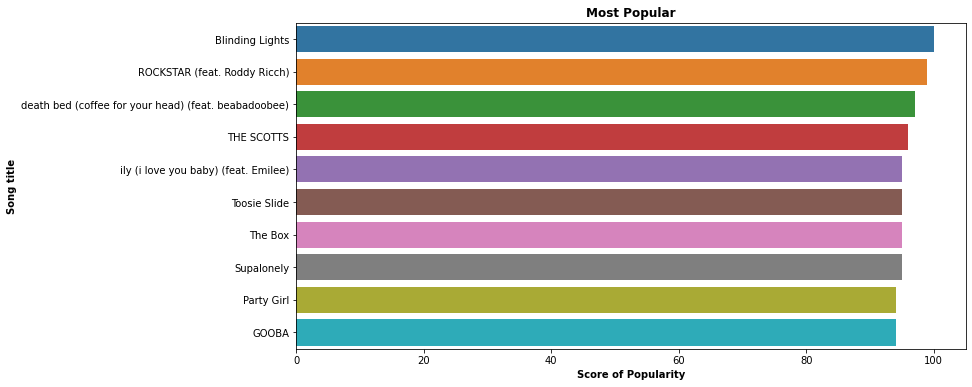

In [ ]:
popularity=data.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['name'].head(10), data=popularity)

plt.title('Most Popular', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Song title', weight='bold')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   danceability      169909 non-null  float64
 2   energy            169909 non-null  float64
 3   explicit          169909 non-null  int64  
 4   instrumentalness  169909 non-null  float64
 5   liveness          169909 non-null  float64
 6   loudness          169909 non-null  float64
 7   name              169909 non-null  object 
 8   popularity        169909 non-null  int64  
 9   tempo             169909 non-null  float64
 10  valence           169909 non-null  float64
 11  Artists           169909 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 15.6+ MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
song_scaled_df=scaling.fit_transform(df[['acousticness','popularity','danceability','tempo','instrumentalness','valence','loudness','energy']])
song_normalized_df=pd.DataFrame(song_scaled_df,columns=['acousticness','popularity','danceability','tempo','instrumentalness','valence','loudness','energy'])
song_normalized_df.head()

,acousticness,popularity,danceability,tempo,instrumentalness,valence,loudness,energy
0,0.998996,0.00,0.716599,0.485348,0.563,0.7790,0.745000,0.1950
1,0.997992,0.00,0.383603,0.344019,0.901,0.0767,0.494026,0.0135
2,0.606426,0.00,0.758097,0.439086,0.000,0.8800,0.627609,0.2200
3,0.998996,0.00,0.790486,0.442470,0.887,0.7200,0.708887,0.1300
4,0.993976,0.01,0.212551,0.254614,0.908,0.0693,0.676079,0.2040


In [ ]:
score = [(song_normalized_df['valence'] * 0.5 + song_normalized_df['danceability'] * 0.5) *0.2 
         + (song_normalized_df['loudness'] * 0.33 + song_normalized_df['energy'] * 0.33 + song_normalized_df['tempo'] * 0.33) *0.3
         + song_normalized_df['popularity']*0.3
         + song_normalized_df['acousticness']*0.1
         + song_normalized_df['instrumentalness']*0.1]

In [ ]:
#print(score)
df4=pd.DataFrame(score).T
df4.head()

,0
0,0.446869
1,0.320232
2,0.351835
3,0.466503
4,0.333717


In [ ]:
df4.info()
df4.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       169909 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


,0
count,169909.000000
mean,0.439259
std,0.078240
min,0.000000
25%,0.387331
50%,0.443196
75%,0.494538
max,0.732556


In [ ]:
df['score']=df4

In [ ]:
df.head()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,name,popularity,tempo,valence,Artists,score
0,0.995,0.708,0.1950,0,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,118.469,0.7790,Carl Woitschach,0.446869
1,0.994,0.379,0.0135,0,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,83.972,0.0767,"Robert Schumann, Vladimir Horowitz",0.320232
2,0.604,0.749,0.2200,0,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,107.177,0.8800,Seweryn Goszczyński,0.351835
3,0.995,0.781,0.1300,0,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,108.003,0.7200,Francisco Canaro,0.466503
4,0.990,0.210,0.2040,0,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,62.149,0.0693,"Frédéric Chopin, Vladimir Horowitz",0.333717


In [ ]:
songs = df.sort_values(['score'], ascending=False)
songs[['name', 'score']].head(20)

,name,score
82143,Green Onions,0.732556
124737,Burning,0.719399
107156,In My Room,0.717547
95802,You Can Have It All,0.714269
95932,Me Gustas Tu,0.713432
70189,Abeja,0.707145
96810,Mojo So Dope,0.703773
144066,Судно (Борис Рижий),0.699665
88001,Hasta Que Dios Diga,0.698036
97105,Blondie,0.697027
